<center> <h2 style="color:blac;">UNIVERSIDAD NACIONAL AGRARIA LA MOLINA</h2
<center> <h2 style="color:blac;">FACULTAD DE ECONOMÍA Y PLANIFICACIÓN</h2
<center> <h2 style="color:blac;">ESTADÍSTICA INFORMÁTICA</h2
<center>
 <img src="http://www.lamolina.edu.pe/portada/html/acerca/escudos/download/color/1193x1355_ESCUDOCOLOR.png" alt="Turing's Device" style="width:25%;">
</center>

### *PROFESORA :*

Vargas Paredes ,Ana Cecilia

### *Curso :*
Lenguaje de Programacion II

### *INTEGRANTES :*
- Postigo Tafur, Luis Sebastian    -  20220774
- Sanchez Pacuri, Gerson Junior    -  2022077
- Arévalo Aquije, Eduardo  Daniel  -  202207

<center> <h2 style="color:blac;">LIMA - PERÚ</h2
<center> <h2 style="color:blac;">2024</h2

## 1. INTRODUCCIÓN
En la era digital actual, la accesibilidad y diversidad de eventos culturales en las ciudades son aspectos fundamentales que no solo enriquecen la vida urbana, sino que también reflejan la vitalidad cultural de una comunidad. El aumento de plataformas en línea ha democratizado el acceso a información sobre eventos, permitiendo a los ciudadanos y visitantes explorar una amplia gama de actividades culturales con facilidad. En este contexto, el presente proyecto se enfoca en comparar la oferta de eventos culturales utilizando las APIs gratuitas de Eventful y Eventbrite. Estas plataformas destacan por su capacidad de aglutinar eventos diversos, desde exposiciones artísticas y conciertos hasta conferencias y festivales, ofreciendo una ventana al dinámico panorama cultural de diversas ciudades alrededor del mundo

## 2. OBJETIVOS

1. **Obtener datos de eventos:** Utilizar las APIs de  EVENTFUL y la pagina web EVENBRITE  para recopilar información básica de eventos como títulos, fechas, ubicaciones .


2. **Comparar la cantidad de eventos:** Implementar un algoritmo para contar y comparar la cantidad total de eventos culturales disponibles en cada plataforma para las ciudades seleccionadas.


3. **Visualizar resultados:** Presentar los resultados del análisis mediante una manera simple y comprensible que muestren las diferencias en la cantidad de eventos culturales entre las dos plataformas.

## 3. Metodología


#### 3.1 API UTILIZADA :

#####  Eventful API
La API de Eventful permite acceder a una extensa base de datos de eventos que ocurren en todo el mundo. Está diseñada para facilitar la integración de información sobre eventos en aplicaciones web y móviles, ofreciendo datos detallados sobre conciertos, festivales, exposiciones, conferencias, actividades deportivas y más.

###### Características principales:

* Fecha: Permite buscar eventos según diferentes criterios de tiempo, como fechas específicas, rangos de fechas, y términos relativos (por ejemplo, "hoy", "esta semana").
* Ubicación: La API permite buscar eventos en ubicaciones específicas, ya sea por ciudad, estado, país o incluso por coordenadas geográficas precisas.
* Categorías: Los eventos están categorizados, lo que permite filtrar búsquedas por tipos de eventos como música, deportes, arte, tecnología, etc.

#####  EVENTBRITE PAGINA WEB
Eventbrite es una plataforma en línea que permite a los usuarios descubrir, crear y gestionar eventos de diversos tipos en todo el mundo. Está diseñada para facilitar la organización y promoción de eventos, ofreciendo herramientas para la venta de entradas, la gestión de asistentes y la promoción en redes sociales.

###### Características principales:
* Fecha: Permite buscar eventos según diferentes criterios de tiempo, como fechas específicas, rangos de fechas, y términos relativos (por ejemplo, "hoy", "este fin de semana").
* Ubicación: Los usuarios pueden buscar eventos en ubicaciones específicas, ya sea por ciudad, estado, país o por coordenadas geográficas precisas.
* Categorías: Los eventos están categorizados, lo que permite filtrar búsquedas por tipos de eventos como negocios, arte, música, deportes, tecnología, y más.
* Gestión de Entradas: Proporciona diversas opciones para la gestión de entradas, incluyendo entradas digitales, físicas, y códigos QR para la entrada rápida.



#### 3.2 EXTRACCIÓN DE API

##### Eventful API

In [43]:
import requests

# Reemplaza $ACCESS_TOKEN con tu token real
ACCESS_TOKEN = "lH1FqMJzoCJJ7VItOGiJDc9iuJYxbMFaSYwgntM3"

response = requests.get(
    url="https://api.predicthq.com/v1/events",
    headers={
        "Authorization": f"Bearer {ACCESS_TOKEN}",
        "Accept": "application/json"
    }
)

# Imprimir la respuesta JSON
print(response.json())


{'count': 5000, 'overflow': True, 'next': 'https://api.predicthq.com/v1/events/?limit=10&offset=10', 'previous': None, 'results': [{'relevance': 0.0, 'id': '33Qv367J3tnMknZ8p6', 'title': "The Used with Plain White T's and Raue", 'alternate_titles': ['The Used at House Of Blues'], 'description': 'Sourced from predicthq.com', 'category': 'concerts', 'labels': ['concert', 'music'], 'rank': 52, 'local_rank': 74, 'phq_attendance': 1222, 'entities': [{'entity_id': '33ByD3ZdbHaqack22DKKeMu', 'name': 'House of Blues New Orleans', 'type': 'venue', 'formatted_address': '225 Decatur Street\nNew Orleans, LA 70130\nUnited States of America'}], 'duration': 0, 'start': '2024-10-08T00:00:00Z', 'start_local': '2024-10-07T19:00:00', 'end': '2024-10-08T00:00:00Z', 'end_local': '2024-10-07T19:00:00', 'predicted_end': '2024-10-08T04:10:00Z', 'predicted_end_local': '2024-10-07T23:10:00', 'updated': '2024-07-10T12:51:30Z', 'first_seen': '2024-06-12T01:41:17Z', 'timezone': 'America/Chicago', 'location': [-90.

##### Explicacion del codigo

* URL de la API: Se define la URL del endpoint de la API de PredictHQ que se va a utilizar. En este caso, la URL es 'https://api.predicthq.com/v1/events'.
* Bearer Token: Se utiliza un token de autenticación (Bearer token) para autorizar la solicitud. Este token se incluye en los encabezados de la solicitud.
* Realizar la Solicitud GET: Se utiliza la librería requests de Python para realizar una solicitud GET a la URL de la API con los encabezados especificados.
* Procesamiento de la Respuesta: Se convierte la respuesta JSON en un diccionario de Python utilizando response.json().

#### 3.3 EXTRACCION PAGINA WEB

##### Eventbrite

In [19]:

from bs4 import BeautifulSoup
import requests

url = "https://www.eventbrite.es/d/united-states/music--events/los-angeles/?page=1"
response = requests.get(url)

if response.status_code == 200:
    print("Obtuvimos la página")
    soup = BeautifulSoup(response.content, 'html.parser')
    eventos = soup.find_all('div', class_="Container_root__4i85v NestedActionContainer_root__1jtfr event-card event-card__horizontal horizontal-event-card__action-visibility")
else:
    print("Error al cargar la web")


Obtuvimos la página


##### Explicacion del codigo

* BeautifulSoup: Una biblioteca de Python utilizada para analizar documentos HTML y XML.
* url: La URL de la página web que se quiere obtener. En este caso, es una página de eventos musicales en Los Ángeles en el sitio "Eventbrite".
* requests.get(url): Envía una solicitud HTTP GET a la URL especificada y devuelve una respuesta que se almacena en la variable response.
* soup.find_all: Encuentra todos los elementos div en el HTML que tienen la clase específica que identifica los eventos en la página de Eventbrite. La lista de estos elementos se almacena en la variable eventos.


#### 3.4  EXTRACCIÓN DE DATOS

### EVENTFUL

El código realiza una solicitud a la API de PredictHQ para obtener información sobre eventos de conciertos en Miami, FL, específicamente el 11 de julio de 2024. Se configura con los parámetros necesarios, incluyendo la categoría de eventos (musical), las coordenadas de Miami, y el rango de fechas especificado.

Al obtener la respuesta de la API, el código procesa los datos, maneja la paginación para asegurarse de obtener todos los eventos disponibles, y luego imprime la cantidad total de eventos encontrados. Para cada evento, imprime los detalles en un formato específico: el título del evento, la fecha y hora de inicio y fin, finalmente las coordenadas de la ubicación del evento.



In [6]:
import requests
from datetime import datetime

# URL de la API de PredictHQ para eventos
url_predictHQ = 'https://api.predicthq.com/v1/events/'

# Coordenadas de Miami, FL
latitude = 25.7617
longitude = -80.1918

# Fecha específica para los eventos (11 de julio de 2024)
start_date = datetime(2024, 7, 11)
end_date = start_date.replace(hour=23, minute=59, second=59)  # Termina a las 23:59:59 del mismo día

# Formatear fechas para la solicitud API (ISO 8601)
start_date_iso = start_date.isoformat()
end_date_iso = end_date.isoformat()

# Configurar parámetros de la solicitud
params_predictHQ = {
    'category': 'concerts',
    'location_around.origin': f"{latitude},{longitude}",
    'start.gte': start_date_iso,
    'end.lt': end_date_iso,
    'limit': 100,  # Usamos un límite alto para intentar obtener todos los eventos (aunque puede variar según la API)
    'offset': 0
}

# Token de acceso para la autenticación Bearer (reemplaza con tu token real)
token_predictHQ = '8aJUiAcEw6Y30YKQu8LzkCl_QqFNTUGEWH5OlV2B'

# Encabezados de la solicitud
headers_predictHQ = {
    'Authorization': f'Bearer {token_predictHQ}',
    'Accept': 'application/json'
}

try:
    # Inicializar variables para almacenar todos los eventos
    all_events = []
    total_events = 0

    while True:
        # Realizar la solicitud GET a PredictHQ
        response_predictHQ = requests.get(url_predictHQ, headers=headers_predictHQ, params=params_predictHQ)

        # Verificar si la solicitud fue exitosa (código 200)
        response_predictHQ.raise_for_status()

        # Convertir la respuesta a JSON
        data_predictHQ = response_predictHQ.json()

        # Obtener los eventos de la respuesta
        if 'results' in data_predictHQ:
            events = data_predictHQ['results']
            all_events.extend(events)
            total_events += len(events)
            
            # Verificar si hay más páginas de resultados
            if 'next' in data_predictHQ.get('pagination', {}):
                params_predictHQ['offset'] += params_predictHQ['limit']
            else:
                break
        else:
            break

    # Imprimir la cantidad total de eventos encontrados
    print(f"Total de eventos encontrados: {total_events}")

    # Procesar y mostrar los detalles de cada evento
    for event in all_events:
        print(f"--- Evento ---")
        print(f"Título: {event['title']}")
        print(f"Comienza: {event['start']}")
        print(f"Termina: {event['end']}")
        print(f"Localización: {event['location']}")
        print("----------------")

except requests.exceptions.RequestException as e:
    print(f'Error al realizar la solicitud a PredictHQ: {e}')

except KeyError as e:
    print(f'Error al procesar los datos de respuesta de PredictHQ: {e}')


Total de eventos encontrados: 50
--- Evento ---
Título: Bachata Dreams... a Fantastic New Dance World!
Comienza: 2024-07-11T00:30:00Z
Termina: 2024-07-11T06:00:00Z
Localización: [-80.18902299999999, 25.830171]
----------------
--- Evento ---
Título: Thouxanbanfauni
Comienza: 2024-07-11T23:00:00Z
Termina: 2024-07-11T23:00:00Z
Localización: [-80.12059, 25.85164]
----------------
--- Evento ---
Título: Ben Siems and The Willie August Project
Comienza: 2024-07-11T23:45:00Z
Termina: 2024-07-11T23:45:00Z
Localización: [-93.1769867, 44.9313545]
----------------
--- Evento ---
Título: The Guilderland Town Band
Comienza: 2024-07-11T23:30:00Z
Termina: 2024-07-11T23:30:00Z
Localización: [-73.93324, 42.70084]
----------------
--- Evento ---
Título: Michael Charles
Comienza: 2024-07-11T23:30:00Z
Termina: 2024-07-11T23:30:00Z
Localización: [-95.3759206, 40.7664525]
----------------
--- Evento ---
Título: Warren Zeiders
Comienza: 2024-07-11T23:30:00Z
Termina: 2024-07-11T23:30:00Z
Localización: [-73.5

#### PAGINA WEB EVENBRITE

El código realiza un web scraping en el sitio web "Eventbrite" para obtener información sobre todos los eventos en Los Angeles,  específicamente el 11 de julio de 2024. Se configura para navegar en las páginas del sitio web y extraer datos relevantes de los eventos, tales como el título del evento , fecha , hora de inicio y la ubicación del evento.


In [20]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import re

url = "https://www.eventbrite.es/d/united-states/music--events/los-angeles/?page=1"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    eventos = soup.find_all('div', class_="Container_root__4i85v NestedActionContainer_root__1jtfr event-card event-card__horizontal horizontal-event-card__action-visibility")
    print(f"Cantidad de eventos: {len(eventos)}")
    contador = 0
    for evento in eventos:
        nombre_evento = evento.find('h2').text.strip()  # Ajusta 'h3' según la estructura HTML
        fecha_evento = evento.find(class_="Typography_root__487rx #585163 Typography_body-md__487rx event-card__clamp-line--one Typography_align-match-parent__487rx").text.strip()  # Ajusta 'fecha-clase-evento' según la estructura HTML
    
        
        contador += 1  # Incrementa el contador

        # Simulación de la cadena de fecha y hora extraída
        fecha_evento_completa = fecha_evento

        # Convertir la fecha y hora al formato deseado
        # Asumiendo que quieres convertir "Tomorrow" a una fecha específica como "11 de julio"
        # y mantener la hora "6 PM" tal cual. Necesitarás ajustar esto según tu lógica para determinar la fecha correcta.

        # Ejemplo de cómo podrías hacerlo si ya conoces la fecha del evento
        fecha_conocida = "2023-07-11"  # Ajusta esta fecha según sea necesario
        hora_evento_match = re.search(r'\d{1,2}:\d{2}\s*[APap][mM]', fecha_evento_completa)

        if hora_evento_match:
            hora_evento = hora_evento_match.group()
            fecha_evento_dt = datetime.strptime(f"{fecha_conocida} {hora_evento}", '%Y-%m-%d %I:%M %p')
            fecha_evento_formateada = fecha_evento_dt.strftime('%d de %B, %I %p').replace('AM', 'am').replace('PM', 'pm')
            print(f"Evento #{contador}:\nNombre del Evento: {nombre_evento}\nFecha del Evento: {fecha_evento_formateada}\n")
        else:
            print("Formato de hora no reconocido")
else:
    print("Error al cargar la web")





Cantidad de eventos: 20
Evento #1:
Nombre del Evento: Biggest House Music + Tech House Party in Los Angeles! 18+
Fecha del Evento: 11 de July, 10 pm

Evento #2:
Nombre del Evento: Lust for Life:  Lana Del Rey Dance Party [Los Angeles]
Fecha del Evento: 11 de July, 09 pm

Evento #3:
Nombre del Evento: Let It Happen: Tame Impala Dance Party [Los Angeles]
Fecha del Evento: 11 de July, 10 pm

Evento #4:
Nombre del Evento: Electric Ave @ Los Globos (Los Angeles)
Fecha del Evento: 11 de July, 10 pm

Evento #5:
Nombre del Evento: NICE FOR WHAT 5 YEAR ANNIVERSARY (LOS ANGELES)
Fecha del Evento: 11 de July, 09 pm

Evento #6:
Nombre del Evento: Dance Yourself Clean Pool Party (Los Angeles)
Fecha del Evento: 11 de July, 01 pm

Evento #7:
Nombre del Evento: Social Overnight @ Los Globos (Los Angeles)
Fecha del Evento: 11 de July, 10 pm

Evento #8:
Nombre del Evento: The Hustle: 70's Disco Party [Los Angeles]
Fecha del Evento: 11 de July, 09 pm

Evento #9:
Nombre del Evento: Reggaeton and Hip-Hop P

##### ALL EVENTS

El código realiza una web scraping en el sitio web "All Events" para obtener información sobre todos los eventos en Los Angeles, FL. Se configura para navegar en las páginas del sitio web y extraer datos relevantes de los eventos, tales como el título del evento, la categoría, la fecha y hora de inicio y fin, el país, una descripción breve y la ubicación del evento.

El código maneja la paginación para asegurarse de obtener todos los eventos disponibles. Luego, imprime la cantidad total de eventos encontrados y, para cada evento, imprime los detalles en el siguiente formato: Nombre del evento , Ubicacion y Fecha.

In [16]:
from bs4 import BeautifulSoup
import requests

url = "https://allevents.in/los%20angeles#search"
response = requests.get(url)

if response.status_code == 200:
    print("Obtuvimos la página")
    soup = BeautifulSoup(response.content, 'html.parser')
    eventos = soup.find_all('li', class_="event-card event-card-link")
    print(f"Cantidad de eventos: {len(eventos)}")
    contador = 1
    for evento in eventos:
        nombre_evento = evento.find('h3').text.strip()  # Ajusta 'h3' según la estructura HTML
        fecha_evento = evento.find(class_='date').text.strip()  # Ajusta 'fecha-clase-evento' según la estructura HTML
    
        print(f"Evento #{contador}:\nNombre del Evento: {nombre_evento}\nFecha del Evento: {fecha_evento}\n")
        contador += 1  # Incrementa el contador
else:
    print("Error al cargar la web")

Obtuvimos la página
Cantidad de eventos: 64
Evento #1:
Nombre del Evento: EL DIA DEL SALVADORENO USA FESTIVAL 2024
Fecha del Evento: 03-04 Aug

Evento #2:
Nombre del Evento: Salsa and Bachata at 18 Social
Fecha del Evento: Multiple Dates

Evento #3:
Nombre del Evento: Omid Djalili Present: Namaste Live in Los Angeles
Fecha del Evento: Sat, 05 Oct

Evento #4:
Nombre del Evento: Salsa and Bachata at Zaya
Fecha del Evento: Multiple Dates

Evento #5:
Nombre del Evento: Halloween Downtown LA Club Crawl
Fecha del Evento: Multiple Dates

Evento #6:
Nombre del Evento: Drunk N Stoned Fest
Fecha del Evento: 10-11 Jul

Evento #7:
Nombre del Evento: Back to School Fair! Free Backpack and School Supply Giveaway
Fecha del Evento: Sat, 10 Aug

Evento #8:
Nombre del Evento: Kobe Day - Back to School Backpack Giveaway
Fecha del Evento: Sat, 24 Aug

Evento #9:
Nombre del Evento: 2024 Back to School Community Fair
Fecha del Evento: Sat, 17 Aug

Evento #10:
Nombre del Evento: Free Baby Expo & Resource Fai

## 4. Análisis Comparativo

In [4]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import re

# Función para obtener eventos de Eventbrite
def obtener_eventos_eventbrite(url):
    response = requests.get(url)
    eventos = []

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        eventos_html = soup.find_all('div', class_="Container_root__4i85v NestedActionContainer_root__1jtfr event-card event-card__horizontal horizontal-event-card__action-visibility")

        for evento_html in eventos_html:
            nombre_evento = evento_html.find('h2').text.strip()
            fecha_evento = evento_html.find(class_="Typography_root__487rx #585163 Typography_body-md__487rx event-card__clamp-line--one Typography_align-match-parent__487rx").text.strip()

            # Aquí podrías incluir más detalles según sea necesario

            eventos.append({
                'nombre': nombre_evento,
                'fecha': fecha_evento,
                # Agrega más campos si los necesitas
            })

    else:
        print("Error al cargar la página de Eventbrite")

    return eventos

# Función para obtener eventos de PredictHQ
def obtener_eventos_predicthq():
    url_predictHQ = 'https://api.predicthq.com/v1/events/'
    latitude = 25.7617
    longitude = -80.1918
    start_date = datetime(2024, 7, 11)
    end_date = start_date.replace(hour=23, minute=59, second=59)
    start_date_iso = start_date.isoformat()
    end_date_iso = end_date.isoformat()
    params_predictHQ = {
        'category': 'concerts',
        'location_around.origin': f"{latitude},{longitude}",
        'start.gte': start_date_iso,
        'end.lt': end_date_iso,
        'limit': 100,
        'offset': 0
    }
    token_predictHQ = '8aJUiAcEw6Y30YKQu8LzkCl_QqFNTUGEWH5OlV2B'
    headers_predictHQ = {
        'Authorization': f'Bearer {token_predictHQ}',
        'Accept': 'application/json'
    }
    eventos = []

    try:
        while True:
            response_predictHQ = requests.get(url_predictHQ, headers=headers_predictHQ, params=params_predictHQ)
            response_predictHQ.raise_for_status()
            data_predictHQ = response_predictHQ.json()

            if 'results' in data_predictHQ:
                for event in data_predictHQ['results']:
                    eventos.append({
                        'nombre': event['title'],
                        'fecha': event['start'],
                        # Agrega más campos si los necesitas
                    })

                if 'next' in data_predictHQ.get('pagination', {}):
                    params_predictHQ['offset'] += params_predictHQ['limit']
                else:
                    break
            else:
                break

    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud a PredictHQ: {e}')

    except KeyError as e:
        print(f'Error al procesar los datos de respuesta de PredictHQ: {e}')

    return eventos

# URL de Eventbrite y obtención de eventos
url_eventbrite = "https://www.eventbrite.es/d/united-states/music--events/los-angeles/?page=1"
eventos_eventbrite = obtener_eventos_eventbrite(url_eventbrite)

# Obtención de eventos de PredictHQ
eventos_predicthq = obtener_eventos_predicthq()

# Comparación de eventos
total_eventos_eventbrite = len(eventos_eventbrite)
total_eventos_predicthq = len(eventos_predicthq)

print(f"Total de eventos encontrados en Eventbrite: {total_eventos_eventbrite}")
print(f"Total de eventos encontrados en PredictHQ: {total_eventos_predicthq}")
print()

# Ejemplo de comparación básica de eventos (puedes extender esta lógica según tus necesidades)
for i in range(min(total_eventos_eventbrite, total_eventos_predicthq)):
    evento_eventbrite = eventos_eventbrite[i]
    evento_predicthq = eventos_predicthq[i]

    print(f"Evento {i+1}:")
    print(f"Eventbrite - Nombre: {evento_eventbrite['nombre']}, Fecha: {evento_eventbrite['fecha']}")
    print(f"PredictHQ - Nombre: {evento_predicthq['nombre']}, Fecha: {evento_predicthq['fecha']}")
    print()


Total de eventos encontrados en Eventbrite: 20
Total de eventos encontrados en PredictHQ: 50

Evento 1:
Eventbrite - Nombre: Biggest House Music + Tech House Party in Los Angeles! 18+, Fecha: Saturday at 10:00 PM
PredictHQ - Nombre: Bachata Dreams... a Fantastic New Dance World!, Fecha: 2024-07-11T00:30:00Z

Evento 2:
Eventbrite - Nombre: Lust for Life:  Lana Del Rey Dance Party [Los Angeles], Fecha: Friday at 9:00 PM
PredictHQ - Nombre: Thouxanbanfauni, Fecha: 2024-07-11T23:00:00Z

Evento 3:
Eventbrite - Nombre: Let It Happen: Tame Impala Dance Party [Los Angeles], Fecha: Sat, Jul 20, 10:00 PM
PredictHQ - Nombre: Ben Siems and The Willie August Project, Fecha: 2024-07-11T23:45:00Z

Evento 4:
Eventbrite - Nombre: Electric Ave @ Los Globos (Los Angeles), Fecha: Saturday at 10:00 PM
PredictHQ - Nombre: The Guilderland Town Band, Fecha: 2024-07-11T23:30:00Z

Evento 5:
Eventbrite - Nombre: NICE FOR WHAT 5 YEAR ANNIVERSARY (LOS ANGELES), Fecha: Friday at 9:00 PM
PredictHQ - Nombre: Michael 

## 5. Visualización de resultados

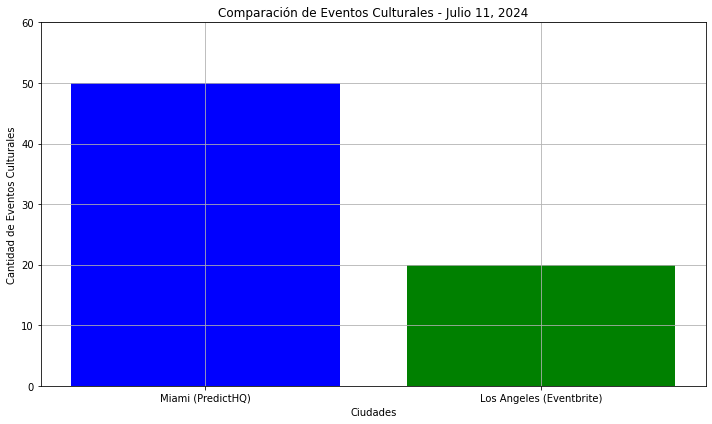

In [5]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Función para obtener eventos de PredictHQ
def obtener_eventos_predicthq(latitude, longitude, start_date):
    url_predictHQ = 'https://api.predicthq.com/v1/events/'
    token_predictHQ = '8aJUiAcEw6Y30YKQu8LzkCl_QqFNTUGEWH5OlV2B'

    # Fecha final para la consulta (mismo día)
    end_date = start_date.replace(hour=23, minute=59, second=59)
    start_date_iso = start_date.isoformat()
    end_date_iso = end_date.isoformat()

    params_predictHQ = {
        'category': 'concerts',  # Ajustar categoría según sea necesario
        'location_around.origin': f"{latitude},{longitude}",
        'start.gte': start_date_iso,
        'end.lt': end_date_iso,
        'limit': 100,
        'offset': 0
    }

    headers_predictHQ = {
        'Authorization': f'Bearer {token_predictHQ}',
        'Accept': 'application/json'
    }

    try:
        total_events = 0
        page = 1

        while True:
            response_predictHQ = requests.get(url_predictHQ, headers=headers_predictHQ, params=params_predictHQ)
            response_predictHQ.raise_for_status()
            data_predictHQ = response_predictHQ.json()

            if 'results' in data_predictHQ:
                events = data_predictHQ['results']
                total_events += len(events)
                
                if 'next' in data_predictHQ.get('pagination', {}):
                    params_predictHQ['offset'] = page * params_predictHQ['limit']
                    page += 1
                else:
                    break
            else:
                break

        return total_events

    except requests.exceptions.RequestException as e:
        print(f'Error al realizar la solicitud a PredictHQ: {e}')
        return None

    except KeyError as e:
        print(f'Error al procesar los datos de respuesta de PredictHQ: {e}')
        return None

# Función para obtener eventos de Eventbrite
def obtener_eventos_eventbrite(city_url):
    response = requests.get(city_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        eventos = soup.find_all('div', class_="Container_root__4i85v NestedActionContainer_root__1jtfr event-card event-card__horizontal horizontal-event-card__action-visibility")
        return len(eventos)
    else:
        print(f"Error al cargar la web de Eventbrite para {city_url}")
        return None

# Coordenadas de Miami, FL para PredictHQ
latitude_miami = 25.7617
longitude_miami = -80.1918

# URL de Eventbrite para Los Angeles
url_eventbrite_los_angeles = "https://www.eventbrite.es/d/united-states/music--events/los-angeles/?page=1"

# Fecha específica para la consulta
start_date = datetime(2024, 7, 11)

# Obtener cantidad de eventos culturales para Miami usando PredictHQ
total_eventos_miami_predicthq = obtener_eventos_predicthq(latitude_miami, longitude_miami, start_date)

# Obtener cantidad de eventos culturales para Los Angeles usando Eventbrite
total_eventos_los_angeles_eventbrite = obtener_eventos_eventbrite(url_eventbrite_los_angeles)

# Crear el gráfico
ciudades = ['Miami (PredictHQ)', 'Los Angeles (Eventbrite)']
eventos = [total_eventos_miami_predicthq, total_eventos_los_angeles_eventbrite]

plt.figure(figsize=(10, 6))
plt.bar(ciudades, eventos, color=['blue', 'green'])
plt.xlabel('Ciudades')
plt.ylabel('Cantidad de Eventos Culturales')
plt.title('Comparación de Eventos Culturales - Julio 11, 2024')
plt.ylim(0, max(eventos) * 1.2)  # Ajusta el límite vertical para mejor visualización
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 6. Conclusión